## Lab 1 (Machine Learning - DD2421)

### Antonio Frederico Nesti Lopes - afnl@kth.se
### Theodoros Panagiatakopoulos - thepan@kth.se

### Presentation time: FRI 20/09/2019 15:45 

------------------------------------------------------------
------------------------------------------------------------

In [4]:
# use packages
import monkdata as m
import dtree as d
import drawtree_qt4 as qt
import pandas as pd
import random
import numpy as np
import seaborn as sns

## Stating the Problem:

### Monk's datasets are a collection of three binary classification problems (True or False) over six attribute discrete domain. All the possible values for the attributes are given in the table below.

In [5]:
# Set of values for each attribute:
print('POSSIBLE OF VALUES FOR EACH ATTRIBUTE:')

df_att_val = pd.DataFrame(
    {
    "Attributes" : ["Possible Values"],
    "a1": [m.attributes[0].values],
    "a2": [m.attributes[1].values],
    "a3": [m.attributes[2].values],
    "a4": [m.attributes[3].values],
    "a5": [m.attributes[4].values],
    "a6": [m.attributes[5].values]    
    }
)
df_att_val

POSSIBLE OF VALUES FOR EACH ATTRIBUTE:


,Attributes,a1,a2,a3,a4,a5,a6
0,Possible Values,"(1, 2, 3)","(1, 2, 3)","(1, 2)","(1, 2, 3)","(1, 2, 3, 4)","(1, 2)"


### Datasets presents True or False classification accordingly to its own generation statement. As follows:

#### MONK-1 : $(a_1 = a_2) \vee (a_5 = 1)$

#### MONK-2 : $a_i = 1$ for exactly two $i \in \{1,2,...,6\}$

#### MONK-3 : $(a_5 = 1 \wedge a_4 = 1) \vee (a_5 \neq 4 \wedge a_2 \neq 3)$

### The problem behind decision trees classification is that, considering those generation statements as unknown, we want to come up with a classification method for the datasets.

### In order to do so, we will try to build a decision tree based on entropy/information gain criteria using sets for training and testing the model. In the end, it is shown how to prune the tree so as to optimise the answer.

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 0</h2>

### Each one of the datasets has properties which makes them hard to learn. Motivate which of the three problems is most difficult for a decision tree algorithm to learn

### Motivation (difficulty to learn):

### 1) Dataset MONK-1 has 3 possibilities for True-clause against 1 possibility for False-Clause. From the theoretical specifications above, we can notice that this dataset clasification depends only on the values of 3 attributes.

### 2) Dataset MONK-2 has much more less possibilities for a True-Clause to appear (very strict clause, we should have EXACTLY 2 numbers equal 1). This dataset classification depends on the values of all the attributes.

### 3) Dataset MONK-3 has an addition of 5% noise perturbation. Moreover, this dataset classification depends only on the values of 3 the attributes.

### MONK-2 seems to be harder to learn, since its classifications depends on a higher quantity of attributes. Even though, MONK-3's dataset aditional noise (5%) will motivate here our decision about learning difficulty.    

### Hypothesis 1: MONK-3 will be more difficult to learn.


In [6]:
### CALL ALL DATASETS

#MONK-1 (train,test)
m1 = m.monk1
m1_test = m.monk1test
#MONK-2 (train,test)
m2 = m.monk2
m2_test = m.monk2test
#MONK-3 (train,test)
m3 = m.monk3
m3_test = m.monk3test

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 1</h2>

### Entropy for train datasets:

### $Entropy(S) = -\sum_{\forall i}p_i\log_2p_i$, where $p_i =$ proportion of examples of class $i \in S$

### OBS: $\mathbb{E}(i) = \sum_{\forall i}i.p_i$

In [4]:
# Entropy for train data

Em1 = d.entropy(m1)
Em2 = d.entropy(m2)
Em3 = d.entropy(m3)

print('ENTROPY OF CLASSIFICATION FOR MONK DATASETS')
df_entr_train = pd.DataFrame(
    {
    "Dataset": ['MONK-1','MONK-2','MONK-3'],
    "Entropy": [Em1,Em2,Em3]
    }
)
df_entr_train

ENTROPY OF CLASSIFICATION FOR MONK DATASETS


,Dataset,Entropy
0,MONK-1,1.000000
1,MONK-2,0.957117
2,MONK-3,0.999806


### The higher the entropy, the more unpredictable is the outcome of a given dataset.

### Thus, dataset MONK-2, on the contrary, is the most predictable one.  

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 2</h2>

### Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy.

### A uniform distribution has no clue about what will happen. There is no bias. Therefore,  the entropy will be higher than some modified uniform distribution. To illustrate this statement we consider, the following extreme situation:

### $U \sim Unif\{1,...,n\}\;;\;\mathbb{P}(U=i)=\frac{1}{n}$
### $\Rightarrow \mathbb{Ent}(U) = - \sum_{i = 1}^{n}\frac{1}{n}.\log_2\frac{1}{n}$
### For $n = 100$, we have $\mathbb{Ent}(U) = 6.6439$
### For $n = 10$, we have $\mathbb{Ent}(U) = 3.32$
### For $n = 3$, we have $\mathbb{Ent}(U) = 1.585$
### Consider $U \sim Unif\{1,...,100\}\;;\;\mathbb{P}(U=1)=0.999$ and $\mathbb{P}(U\neq 1)=10^{-5}\;,\;\therefore \mathbb{Ent}(U) = 0.0179$ 
### Now, consider $U \sim Unif\{1,...,n\}\;;\;\mathbb{P}(U=1)=1$ and $\mathbb{P}(U\neq1)=0\;,\;\therefore \mathbb{Ent}(U) = 0$ (Use L'Hôpital)

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 3</h2>

### Calculate expected information gain corresponding to each of the six attributes.

### Which attribute should be used for splitting the examples at the root node?  

### We should use the one with more information gain.

### Formulation:

### $\mathbb{IG}(S,A) = \mathbb{Ent}(S) -\sum_{k \in A}\frac{|S_k|}{|S|}\mathbb{Ent}(S_k)$

### $S_k \in S$ for the attribute $a = k$ for $a \in A$.

In [5]:
print('AVERAGE INFORMATION GAIN')
df_entr_train = pd.DataFrame(
    {
    "Dataset": ['MONK-1','MONK-2','MONK-3'],
    "a1": [d.averageGain(m1,m.attributes[0]),d.averageGain(m2,m.attributes[0]),d.averageGain(m3,m.attributes[0])],
    "a2": [d.averageGain(m1,m.attributes[1]),d.averageGain(m2,m.attributes[1]),d.averageGain(m3,m.attributes[1])],
    "a3": [d.averageGain(m1,m.attributes[2]),d.averageGain(m2,m.attributes[2]),d.averageGain(m3,m.attributes[2])],
    "a4": [d.averageGain(m1,m.attributes[3]),d.averageGain(m2,m.attributes[3]),d.averageGain(m3,m.attributes[3])],
    "a5": [d.averageGain(m1,m.attributes[4]),d.averageGain(m2,m.attributes[4]),d.averageGain(m3,m.attributes[4])],
    "a6": [d.averageGain(m1,m.attributes[5]),d.averageGain(m2,m.attributes[5]),d.averageGain(m3,m.attributes[5])]
    }
)
df_entr_train

AVERAGE INFORMATION GAIN


,Dataset,a1,a2,a3,a4,a5,a6
0,MONK-1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
1,MONK-2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
2,MONK-3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


### We should pick first the attribute with more information gain for each dataset. 

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 4</h2>

### Q: Looking at the equation for the Information Gain, how does the entropy of the subsets look like when the information gain is maximized?

### A: They tend to zero (to be smaller and smaller).

### Q: How can we motivate using the information gain as a heuristic for picking an attribute for splitting? Think about reduction in entropy after the split and what the entropy implies.  

### A: The attribute that presents the lowest entropy is more "deterministic" and presents more information. Thus, such attribute should be pick first for splitting data.

# Building Decision Trees

### Q: Split data into subsets according to the selected attribute and compute the information gains for the nodes on the next level of the tree.

### Q: Which attributes should be tested for these nodes?

### A: Since we have a classification problem for a decision tree, each value from the attribute chosen for the node will form a branch.

### A: Then, we must compute the average gain for each attribute left in each branch and select a new sppliting criterion.

In [6]:
#######################
### For dataset MONK 1
#######################
## >>> Construction of 1st layer

data=m1

# Set choice from previous table
bestAtt = m.attributes[4] # chosen attribute (5 - look table)

# computation of all info gain for selection of chosen attribute 
info_gain_selects = []
for j in bestAtt.values:
    s1 = d.select(data,bestAtt,j) # selecting all data where a5=j

    info_gain_s1 = []
    for i in range(0,6):
        info_gain_s1.append(d.averageGain(s1,m.attributes[i])) # find its gain for each atribute

    info_gain_selects.append(info_gain_s1)
 

print('SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS')
print('ATTRIBUTE 5 HAS ALREADY BEEN SELECTED')

# remember: attribute 5 has already been selected
df_2ndL_att_val = pd.DataFrame(
    {
    "Values": bestAtt.values,
    "a1": [info_gain_selects[0][0],info_gain_selects[1][0],info_gain_selects[2][0],info_gain_selects[3][0]],
    "a2": [info_gain_selects[0][1],info_gain_selects[1][1],info_gain_selects[2][1],info_gain_selects[3][1]],
    "a3": [info_gain_selects[0][2],info_gain_selects[1][2],info_gain_selects[2][2],info_gain_selects[3][2]],
    "a4": [info_gain_selects[0][3],info_gain_selects[1][3],info_gain_selects[2][3],info_gain_selects[3][3]],
    "a5": [info_gain_selects[0][4],info_gain_selects[1][4],info_gain_selects[2][4],info_gain_selects[3][4]],
    "a6": [info_gain_selects[0][5],info_gain_selects[1][5],info_gain_selects[2][5],info_gain_selects[3][5]],
    "MostCommon": [d.mostCommon(d.select(data,bestAtt,1)),d.mostCommon(d.select(data,bestAtt,2)),d.mostCommon(d.select(data,bestAtt,3)),d.mostCommon(d.select(data,bestAtt,4))]
    }
)
df_2ndL_att_val

SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS
ATTRIBUTE 5 HAS ALREADY BEEN SELECTED


,MostCommon,Values,a1,a2,a3,a4,a5,a6
0,True,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,False,2,0.040217,0.015063,0.037273,0.048892,0.0,0.025807
2,False,3,0.033055,0.002197,0.017982,0.019123,0.0,0.045109
3,False,4,0.206291,0.033898,0.025906,0.075933,0.0,0.003324


### So, we can see from the table that for values = 1 and attribute 5 all info gain are zero, since we had already a division according to this.

### According to the previous table:

### 1) branch with value = 1 should NOT be split anymore
### 2) branch with value = 2 should split according to attribute A4 (more info gain)
### 3) branch with value = 3 should split according to attribute A6 (more info gain)
### 4) branch with value = 4 should split according to attribute A1 (more info gain)


In [7]:
#######################
### For dataset MONK 1
#######################
## >>> Construction of 2nd layer

#### FOR BRANCH WITH VALUE = 2
data=d.select(m1,m.attributes[4],2)

# Set choice from previous table
bestAtt = m.attributes[3] # chosen attribute (4 - look table)

# computation of all info gain for selection of chosen attribute 
info_gain_selects = []
for j in bestAtt.values:
    ss1 = d.select(data,bestAtt,j)

    info_gain_ss1 = []
    for i in range(0,6):
        info_gain_ss1.append(d.averageGain(ss1,m.attributes[i]))

    info_gain_selects.append(info_gain_ss1)
 

print('SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS')
print('BRANCH VALUE = 2 - ATTRIBUTE 4 HAS ALREADY BEEN SELECTED')

# remember: attribute 5 has already been selected
df_2ndL_att_val = pd.DataFrame(
    {
    "Values": bestAtt.values,
    "a1": [info_gain_selects[0][0],info_gain_selects[1][0],info_gain_selects[2][0]],
    "a2": [info_gain_selects[0][1],info_gain_selects[1][1],info_gain_selects[2][1]],
    "a3": [info_gain_selects[0][2],info_gain_selects[1][2],info_gain_selects[2][2]],
    "a4": [info_gain_selects[0][3],info_gain_selects[1][3],info_gain_selects[2][3]],
    "a5": [info_gain_selects[0][4],info_gain_selects[1][4],info_gain_selects[2][4]],
    "a6": [info_gain_selects[0][5],info_gain_selects[1][5],info_gain_selects[2][5]],
    "MostCommon": [d.mostCommon(d.select(data,bestAtt,1)),d.mostCommon(d.select(data,bestAtt,2)),d.mostCommon(d.select(data,bestAtt,3))]
    }
)
df_2ndL_att_val


SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS
BRANCH VALUE = 2 - ATTRIBUTE 4 HAS ALREADY BEEN SELECTED


,Values,a1,a2,a3,a4,a5,a6,MostCommon
0,1,0.060879,0.016313,0.051800,0.0,0.0,0.051800,False
1,2,0.198117,0.591673,0.128085,0.0,0.0,0.198117,False
2,3,0.068187,0.088546,0.130719,0.0,0.0,0.000450,False


In [8]:
#######################
### For dataset MONK 1
#######################
## >>> Construction of 2nd layer

#### FOR BRANCH WITH VALUE = 3
data=d.select(m1,m.attributes[4],3)

# Set choice from previous table
bestAtt = m.attributes[5] # chosen attribute (6 - look table)

# computation of all info gain for selection of chosen attribute 
info_gain_selects = []
for j in bestAtt.values:
    ss1 = d.select(data,bestAtt,j)

    info_gain_ss1 = []
    for i in range(0,6):
        info_gain_ss1.append(d.averageGain(ss1,m.attributes[i]))

    info_gain_selects.append(info_gain_ss1)
 

print('SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS')
print('BRANCH VALUE = 3 - ATTRIBUTE 6 HAS ALREADY BEEN SELECTED')

# remember: attribute 5 has already been selected
df_2ndL_att_val = pd.DataFrame(
    {
    "Values": bestAtt.values,
    "a1": [info_gain_selects[0][0],info_gain_selects[1][0]],
    "a2": [info_gain_selects[0][1],info_gain_selects[1][1]],
    "a3": [info_gain_selects[0][2],info_gain_selects[1][2]],
    "a4": [info_gain_selects[0][3],info_gain_selects[1][3]],
    "a5": [info_gain_selects[0][4],info_gain_selects[1][4]],
    "a6": [info_gain_selects[0][5],info_gain_selects[1][5]],
    "MostCommon": [d.mostCommon(d.select(data,bestAtt,1)),d.mostCommon(d.select(data,bestAtt,2))]
    }
)
df_2ndL_att_val


SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS
BRANCH VALUE = 3 - ATTRIBUTE 6 HAS ALREADY BEEN SELECTED


,Values,a1,a2,a3,a4,a5,a6,MostCommon
0,1,0.036928,0.105897,0.000661,0.128243,0.000000e+00,0.000000e+00,False
1,2,0.034883,0.003585,0.123694,0.034883,1.110223e-16,1.110223e-16,False


In [9]:
#######################
### For dataset MONK 1
#######################
## >>> Construction of 2nd layer

#### FOR BRANCH WITH VALUE = 4
data=d.select(m1,m.attributes[4],4)

# Set choice from previous table
bestAtt = m.attributes[0] # chosen attribute (1 - look table)

# computation of all info gain for selection of chosen attribute 
info_gain_selects = []
for j in bestAtt.values:
    ss1 = d.select(data,bestAtt,j)

    info_gain_ss1 = []
    for i in range(0,6):
        info_gain_ss1.append(d.averageGain(ss1,m.attributes[i]))

    info_gain_selects.append(info_gain_ss1)
 

print('SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS')
print('BRANCH VALUE = 4 - ATTRIBUTE 1 HAS ALREADY BEEN SELECTED')

# remember: attribute 5 has already been selected
df_2ndL_att_val = pd.DataFrame(
    {
    "Values": bestAtt.values,
    "a1": [info_gain_selects[0][0],info_gain_selects[1][0],info_gain_selects[2][0]],
    "a2": [info_gain_selects[0][1],info_gain_selects[1][1],info_gain_selects[2][1]],
    "a3": [info_gain_selects[0][2],info_gain_selects[1][2],info_gain_selects[2][2]],
    "a4": [info_gain_selects[0][3],info_gain_selects[1][3],info_gain_selects[2][3]],
    "a5": [info_gain_selects[0][4],info_gain_selects[1][4],info_gain_selects[2][4]],
    "a6": [info_gain_selects[0][5],info_gain_selects[1][5],info_gain_selects[2][5]],
        "MostCommon": [d.mostCommon(d.select(data,bestAtt,1)),d.mostCommon(d.select(data,bestAtt,2)),d.mostCommon(d.select(data,bestAtt,3))]
    }
)
df_2ndL_att_val

SECOND LAYER FOR DATASET MONK 1 - INFORMATION GAINS FOR DIFFERENT PARTITIONS
BRANCH VALUE = 4 - ATTRIBUTE 1 HAS ALREADY BEEN SELECTED


,Values,a1,a2,a3,a4,a5,a6,MostCommon
0,1,0.000000e+00,0.371232,0.075396,0.075396,0.000000e+00,0.075396,False
1,2,1.110223e-16,0.945660,0.072057,0.253875,1.110223e-16,0.003430,False
2,3,0.000000e+00,0.918296,0.018311,0.029407,0.000000e+00,0.024758,True


 ### Next, we can compare the results with the method for building a tree from the package dtree.py
 
 ### Results are just accordingly. Check below.

In [ ]:
Tree1 = d.buildTree(m1,m.attributes,2)
print(Tree1)
qt.drawTree(Tree1)

A5(+A4(---)A6(--)A1(--+))


<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 5</h2>

### Build full decion trees for all three of Monk datasets.

### Use function "check" to measure the performance of the decision tree on both the training and test datasets.

### Compute the train and test sets errors for the three Monk datasets for the full trees.

### Were your assumptions about the datasets correct?

### Explain the results you get for the training and test datasets.

### Test building tree for MONK 1

In [7]:
Tree1 = d.buildTree(m1,m.attributes)
print(Tree1)
#qt.drawTree(Tree1)

A5(+A4(A1(A2(+--)A2(-++)A2(--+))A2(-+-)A3(A1(A2(+--)+A2(-++))A2(--A1(--+))))A6(A4(A3(A1(A2(+--)A2(-+-)-)-)A1(A2(+--)--)-)A3(A4(A1(+--)A1(-++)+)A1(-A2(-+-)A2(--+))))A1(A2(+--)A2(-+-)A2(+-+)))


In [16]:
t1=d.buildTree(m.monk1, m.attributes);
print(d.check(t1, m.monk1))
print(d.check(t1, m.monk1test))

1.0
0.828703703704


### Test building tree for MONK 2

In [9]:
Tree2 = d.buildTree(m2,m.attributes)
print(Tree2)
#qt.drawTree(Tree2)

A5(A3(A6(-A1(-A2(--A4(--+))A2(-A4(-+-)-)))A4(A2(--A1(-+-))+A1(A2(-A6(-+)-)A2(A6(-+)++)+)))A3(A4(A2(-+-)A6(A1(--+)+)A1(A2(-++)++))A2(A4(++A1(+-A6(+-)))-A1(+A4(+--)-)))A3(A6(A1(-A4(-++)A4(--+))A2(+A1(+-A4(+--))A4(A1(-++)A1(+--)-)))A4(A2(A6(-+)A6(+-)A1(A6(-+)++))A1(A2(-+-)--)A1(A6(+-)--)))A2(A6(-A1(+-A4(++-)))A1(A4(-A3(-+)A3(A6(-+)A6(+-)))A3(+A6(+-))-)A3(A4(--+)-)))


In [19]:
t2=d.buildTree(m.monk2, m.attributes);
print(d.check(t2, m.monk2))
print(d.check(t2, m.monk2test))

1.0
0.69212962963


### Test building tree for MONK 3

In [20]:
Tree3 = d.buildTree(m3,m.attributes)
print(Tree3)
#qt.drawTree(Tree3)

A2(A5(++A4(A1(--+)++)-)A5(+A1(+A4(+-+)+)A3(A4(+A1(--+)A1(+--))+)-)A4(A5(--+A1(--+))--))


In [21]:
t3=d.buildTree(m.monk3, m.attributes);
print(d.check(t3, m.monk3))
print(d.check(t3, m.monk3test))

1.0
0.944444444444


In [22]:
df_check = pd.DataFrame(
    {
    "": ["MONK-1","MONK-2","MONK-3"],
    "E.train": [1-d.check(t1, m.monk1),1-d.check(t2, m.monk2),1-d.check(t3, m.monk3)],
    "E.test": [1-d.check(t1, m.monk1test),1-d.check(t2, m.monk2test),1-d.check(t3, m.monk3test)]
    }
)
df_check

,,E.test,E.train
0,MONK-1,0.171296,0.0
1,MONK-2,0.307870,0.0
2,MONK-3,0.055556,0.0


### Although dataset MONK-2 has less entropy, its testing performed worse.

### Entropy is a concept that only takes into account the proportions for values. While the training procedure takes into account the relations between variables.

### Nevertheless, entropy is used as a way to split data.

# Pruning

### Reduced error pruning: consider each node in a tree as a candidate for removal.

### Remove: if result tree perform at least as well as the original one.

### For checking this use a separate validation dataset (split training set).


In [18]:
# randomly partition
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

# bulding up train and validation datasets
monk1train, monk1val = partition(m.monk1, 0.6)
monk2train, monk2val = partition(m.monk2, 0.6)
monk3train, monk3val = partition(m.monk3, 0.6)

# All possibilities for pruning

### You should stop pruning when all the pruned trees perform worse than the current candidate.

### For MONK-1


In [19]:
T1=d.buildTree(monk1train, m.attributes)

print('Performance of Tree:')
print(d.check(T1,monk1val))
print(' ')
print('Performance of All combinations of Pruning:')
P1=d.allPruned(T1)
for i in range(0,len(P1)):
    print(d.check(P1[i],monk1val))

Performance of Tree:
0.74
 
Performance of All combinations of Pruning:
0.42
0.78
0.74
0.74
0.74
0.78
0.74
0.74
0.74
0.72
0.74
0.74
0.74
0.66
0.74
0.72
0.7


In [20]:
print('Performance of Tree:')
print(d.check(T1,monk1val))
print(' ')
print('Performance of All combinations of Pruning:')
P2=d.allPruned(P1[1])
for i in range(0,len(P2)):
    print(d.check(P2[i],monk1val))

Performance of Tree:
0.74
 
Performance of All combinations of Pruning:
0.42
0.78
0.78
0.76
0.78
0.78
0.78
0.7
0.78
0.76
0.74


In [21]:
P3=d.allPruned(P2[6])
for i in range(0,len(P3)):
    print(d.check(P3[i],monk1val))

0.42
0.78
0.78
0.76
0.78
0.78
0.7
0.78
0.76
0.74


Perform worse then the current --> stop

In [23]:
#i = 7 # from 0 to 15 (len(P1))
#qt.drawTree(P1[i])

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 6</h2>

### The Bias Variance Trade-off 

###  "The process described above may produce good predictions on the training set, but is likely to overfit the data, leading to poor test set performance. This is because the resulting tree might be too complex. A smaller tree with fewer splits (that is, fewer regions R1, . . . ,RJ ) might lead to lower variance and better interpretation at the cost of a little bias." (An Introduction to Statistical Learning - Hastie & Tibshirani)

### The Bias Variance trade-off means that we accept a little deviation in our estimation so as to control the variance of the results better.  

### The procedure responsible to implement this feature is Pruning.

<h2 style="color:rgb(220,30,30);text-decoration:underline;"> Assignment 7</h2>

### MONK-1

In [26]:
runs = 500
fractions = [0.3,0.4,0.5,0.6,0.7,0.8]
m1 = m.monk1

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

monk1test = m.monk1test
results = np.empty((runs,len(fractions))) # store all test Erros over all fractions and runs
fi = 0
for f in fractions:
    for r in range(0,runs):
        monk1train, monk1val = partition(m.monk1, f) 
        
        T=d.buildTree(monk1train, m.attributes)
        prunecheckprev = d.check(T,monk1val)
        
        P = d.allPruned(T)
        checks =[]
        for i in range(0,len(P)):
            checks.append(d.check(P[i],monk1val))
        prunecheckpos = max(checks)
        
        # stop pruning when all the pruned trees perform worse than the current candidate.
        while prunecheckprev <= prunecheckpos:
            T = P[checks.index(max(checks))]
            prunecheckprev = prunecheckpos
            
            P = d.allPruned(T)
            checks =[]
            for i in range(0,len(P)):
                checks.append(d.check(P[i],monk1val))
            prunecheckpos = max(checks)
        
        results[r,fi] = float(d.check(T,monk1test))
    fi += 1

results1 = results
print(results1)            



[[0.72222222 0.83333333 0.75       0.86111111 0.88888889 0.80555556]
 [0.77777778 0.77777778 0.80555556 0.77777778 0.72222222 0.83333333]
 [0.80555556 0.75       0.75       0.78703704 0.80555556 0.75      ]
 ...
 [0.75       0.75       0.80555556 0.83333333 0.75       0.79166667]
 [0.80555556 0.80555556 0.80555556 0.7962963  0.77777778 0.82638889]
 [0.70138889 0.75       0.83333333 0.79166667 0.83333333 0.81481481]]


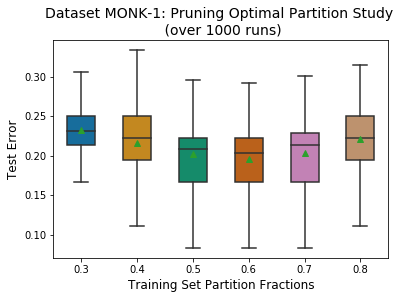

In [27]:
df_results1 = pd.DataFrame(1-results1,columns=fractions)

bplotM1 = sns.boxplot(data=df_results1,
                        width=0.5,
                        palette="colorblind",
                         showmeans=True, showfliers=False)
#boxplotM1 = sns.stripplot(data=df_results1,jitter=True,marker='o',alpha=0.05,color='black')
bplotM1.axes.set_title("Dataset MONK-1: Pruning Optimal Partition Study \n (over 1000 runs)",
                    fontsize=14)

bplotM1.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
bplotM1.set_ylabel("Test Error",
                fontsize=12)
bplotM1

### The boxplot above is seggregated by the fractions used for partitioning the training set into a validation set. 

### The green triangles represents the mean for all the 500 runs of the pruning method. The highest and lowest traces indicates, respectively, the maximum value and the minimum. 

### The middle is the median which represents the value that is in the center of the sample. Right below it we have the 1st quartile and above, the 3rd quartile. 

### This boxplot representation can give a clue on how the sample data is spread, showing if it is symmetric distributed or heavy-tailored.

### Thus, it can be noted that the optimal value for the mean has an amplitude accordingly to the other ones.

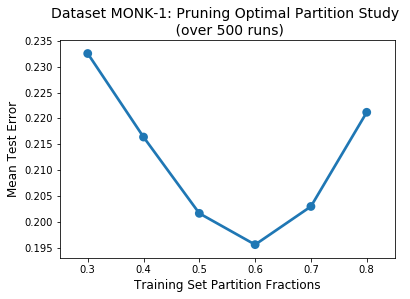

In [42]:
MM1 = sns.pointplot(fractions,np.asarray(df_results1.mean(axis=0)))
MM1.axes.set_title("Dataset MONK-1: Pruning Optimal Partition Study \n (over 500 runs)",
                    fontsize=14)

MM1.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
MM1.set_ylabel("Mean Test Error",
                fontsize=12)
MM1

### In the linegraph above is represented different values for the mean of the test error over 500 runs by the fraction of partitioning the training set.

### It is clear that it exists an optimal value for partition fraction such that minimizes the mean test error.

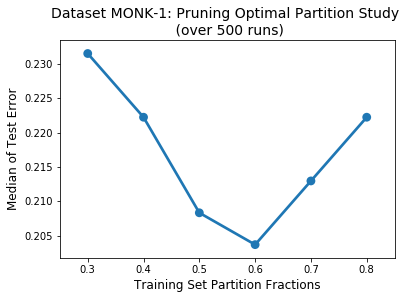

In [43]:
MMed1 = sns.pointplot(fractions,np.asarray(df_results1.median(axis=0)))
MMed1.axes.set_title("Dataset MONK-1: Pruning Optimal Partition Study \n (over 500 runs)",
                    fontsize=14)

MMed1.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
MMed1.set_ylabel("Median of Test Error",
                fontsize=12)
MMed1

### In the linegraph above is represented different values for the median of the test error over 500 runs by the fraction of partitioning the training set. The median is a better statistic than the mean, since it is more robust in respect to new sample values, even though the mean is a non-biased estimator.

### We can see, thus, that the optimal value for the mean is also the optimal value for the median.

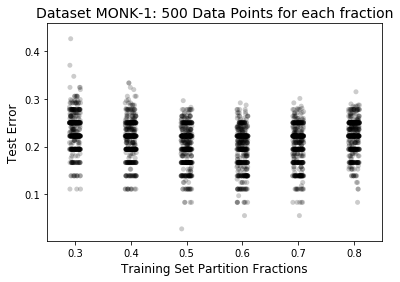

In [44]:
df_results1 = pd.DataFrame(1-results1,columns=fractions)

dpM1 = sns.stripplot(data=df_results1,jitter=True,marker='o',alpha=0.2,color='black')

dpM1.axes.set_title("Dataset MONK-1: 500 Data Points for each fraction",
                    fontsize=14)

dpM1.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
dpM1.set_ylabel("Test Error",
                fontsize=12)
dpM1

### This graph show the data points from the 500 simulation runs used for the pruning procedure.

### MONK-3

In [49]:
runs = 500
fractions = [0.3,0.4,0.5,0.6,0.7,0.8]
m3 = m.monk3

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

monk3test = m.monk3test
results = np.empty((runs,len(fractions))) # store all test Erros over all fractions and runs
fi = 0
for f in fractions:
    for r in range(0,runs):
        monk3train, monk3val = partition(m.monk3, f) 
        
        T=d.buildTree(monk3train, m.attributes)
        prunecheckprev = d.check(T,monk3val)
        
        P = d.allPruned(T)
        checks =[]
        for i in range(0,len(P)):
            checks.append(d.check(P[i],monk3val))
        prunecheckpos = max(checks)
        
        # stop pruning when all the pruned trees perform worse than the current candidate.
        while prunecheckprev <= prunecheckpos:
            T = P[checks.index(max(checks))]
            prunecheckprev = prunecheckpos
            
            P = d.allPruned(T)
            checks =[]
            for i in range(0,len(P)):
                checks.append(d.check(P[i],monk3val))
            prunecheckpos = max(checks)
        
        results[r,fi] = float(d.check(T,monk3test))
    fi += 1

results3 = results
print(results3)           


[[0.88888889 0.9537037  0.88888889 0.97222222 0.97222222 0.88888889]
 [0.88888889 0.97222222 0.94444444 0.97222222 0.97222222 0.94444444]
 [0.86111111 0.87962963 1.         0.97222222 1.         0.96296296]
 ...
 [0.91666667 0.97222222 0.97222222 0.9537037  0.99074074 0.91666667]
 [0.88888889 0.97222222 0.97222222 0.97222222 1.         0.97222222]
 [0.88888889 1.         0.92592593 1.         0.89351852 0.97222222]]


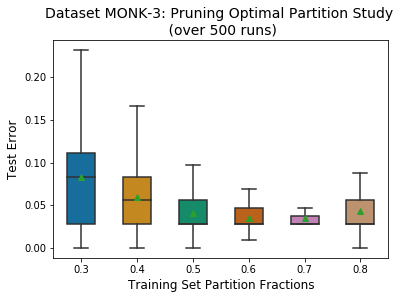

In [50]:
df_results3 = pd.DataFrame(1-results3,columns=fractions)

bplotM3 = sns.boxplot(data=df_results3,
                        width=0.5,
                        palette="colorblind",
                         showmeans=True, showfliers=False)
#boxplotM1 = sns.stripplot(data=df_results,jitter=True,marker='o',alpha=0.05,color='black')
bplotM3.axes.set_title("Dataset MONK-3: Pruning Optimal Partition Study \n (over 500 runs)",
                    fontsize=14)

bplotM3.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
bplotM3.set_ylabel("Test Error",
                fontsize=12)
bplotM3

### The boxplot above is seggregated by the fractions used for partitioning the training set into a validation set. 

### It can be noted that the optimal value for the mean has much less variance than the other values, indicating that the distribution of the error is not so affected by new simulation runs. The results, then, could be more precise with that type of partition.

### For lower partition fractions, we can notice a heavy-tailored right distribution although with a higher median.

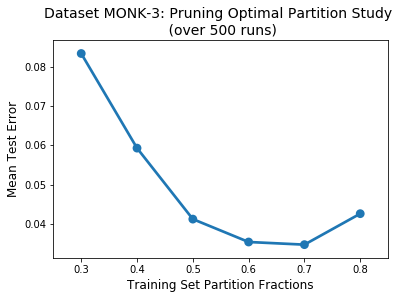

In [51]:
MM3 = sns.pointplot(fractions,np.asarray(df_results3.mean(axis=0)))
MM3.axes.set_title("Dataset MONK-3: Pruning Optimal Partition Study \n (over 500 runs)",
                    fontsize=14)

MM3.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
MM3.set_ylabel("Mean Test Error",
                fontsize=12)
MM3

### In the linegraph above is represented different values for the mean of the test error over 500 runs by the fraction of partitioning the training set.

### It is clear that it exists an optimal value for partition fraction such that minimizes the mean test error. Both values of 0.6 and 0.7 are very close, although 0.7 is the optimal one.

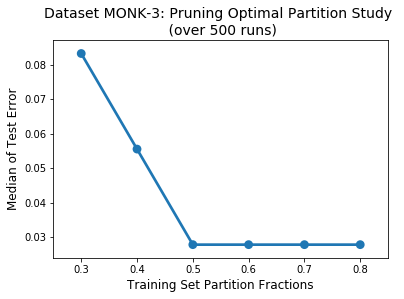

In [52]:
MMed3 = sns.pointplot(fractions,np.asarray(df_results3.median(axis=0)))
MMed3.axes.set_title("Dataset MONK-3: Pruning Optimal Partition Study \n (over 500 runs)",
                    fontsize=14)

MMed3.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
MMed3.set_ylabel("Median of Test Error",
                fontsize=12)
MMed3

### In the linegraph above is represented different values for the median of the test error over 500 runs by the fraction of partitioning the training set. 

### We can see, thus, that the optimal value for the mean is also the optimal value for the median. Moreover, the statistics of f = 0.6 or f = 0.7 are both equally robust. This suggests that the process for partitioning both MONK-1 and MONK-3 datasets could be padronized without the cost of higher error.

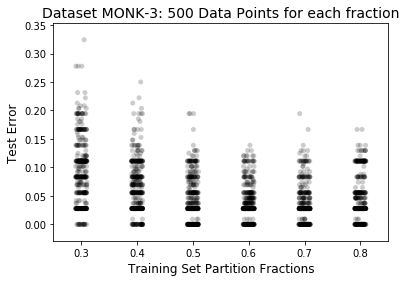

In [53]:
df_results3 = pd.DataFrame(1-results3,columns=fractions)

dpM3 = sns.stripplot(data=df_results3,jitter=True,marker='o',alpha=0.2,color='black')

dpM3.axes.set_title("Dataset MONK-3: 500 Data Points for each fraction",
                    fontsize=14)

dpM3.set_xlabel("Training Set Partition Fractions", 
                fontsize=12)
 
dpM3.set_ylabel("Test Error",
                fontsize=12)
dpM3

### This graph show the data points from the 500 simulation runs used for the pruning procedure.

## Conclusions:

## When the validation set is too small, our estimation of the error is not so accurate. Thus, we do prunning in some ocasions that we shouldn´t.

## When the training set is too small, then the model is not properly trained. Thus, the estimation of the error has higher variance.